In [1]:
from pandas import Series 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix, auc, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore") 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [2]:
# Функция выводит метрики accuracy и f1-score
def logisitc_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f'acc = {acc:.2f} F1-score = {f1:.2f}')

In [3]:
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [4]:
display(train.head(5))
display(train.info())
display(train.describe())

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

None

,client_id,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,default
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,55137.965094,39.280641,0.275749,0.164894,-1.904724,2.000339,56.725701,1.575509,2.496280,41099.775417,1.733330,2.765458,0.126994
std,31841.921168,11.520378,0.804272,0.371087,0.498231,2.252073,13.055717,0.527631,0.689818,46166.322400,1.123622,1.009463,0.332968
min,1.000000,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,0.000000
25%,27440.500000,30.000000,0.000000,0.000000,-2.259534,0.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000,0.000000
50%,55274.000000,37.000000,0.000000,0.000000,-1.920823,1.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000,0.000000
75%,82758.500000,48.000000,0.000000,0.000000,-1.569831,3.000000,60.000000,2.000000,3.000000,48000.000000,2.000000,4.000000,0.000000
max,110147.000000,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000,1.000000


In [5]:
display(test.head(5))
display(test.info())
display(test.describe())

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

None

,client_id,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time
count,36349.000000,36349.000000,36349.000000,36349.000000,36349.000000,36349.000000,36349.000000,36349.000000,36349.000000,36349.000000,36349.000000,36349.000000
mean,54945.647473,39.186002,0.268040,0.166772,-1.904152,2.014471,56.802938,1.573798,2.501087,40835.755729,1.728053,2.765798
std,31706.052195,11.513258,0.788478,0.372777,0.501764,2.296789,13.086646,0.527428,0.683227,43802.180951,1.120686,1.011560
min,4.000000,21.000000,0.000000,0.000000,-3.574197,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000
25%,27744.000000,30.000000,0.000000,0.000000,-2.261909,0.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000
50%,54657.000000,37.000000,0.000000,0.000000,-1.920823,1.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000
75%,82322.000000,48.000000,0.000000,0.000000,-1.563957,3.000000,60.000000,2.000000,3.000000,48000.000000,2.000000,4.000000
max,110148.000000,71.000000,30.000000,1.000000,0.188820,47.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000


In [6]:
sample_submission.head(10)

,client_id,default
0,66799,0.441004
1,25379,0.138092
2,28825,0.373370
3,37530,0.476501
4,4264,0.304640
5,175,0.311599
6,57558,0.584807
7,88407,0.815792
8,79183,0.325037
9,69300,0.094011


In [7]:
default_new = []
for i in train['default']:
    default_new.append(bool(i))
train['default'] = default_new
train['default']

0        False
1        False
2        False
3        False
4        False
         ...  
73794    False
73795    False
73796    False
73797     True
73798    False
Name: default, Length: 73799, dtype: bool

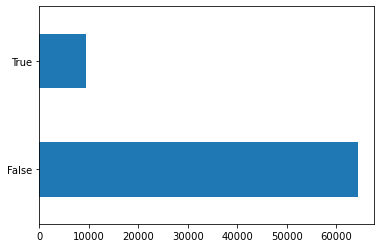

In [8]:
train['default'].value_counts().plot.barh()

(-1.1050945325754051,
 1.100242596789305,
 -1.1067917407007237,
 1.1067226550275022)

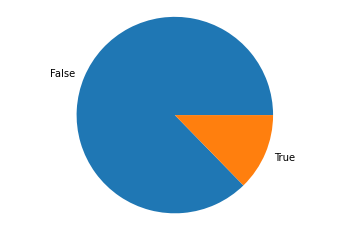

In [9]:
index = [False, True]
fig, ax = plt.subplots()
ax.pie(train['default'].value_counts(), labels=index)
ax.axis("equal")

In [10]:
display(train.isna().sum())
display(test.isna().sum())

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

client_id             0
app_date              0
education           171
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
dtype: int64

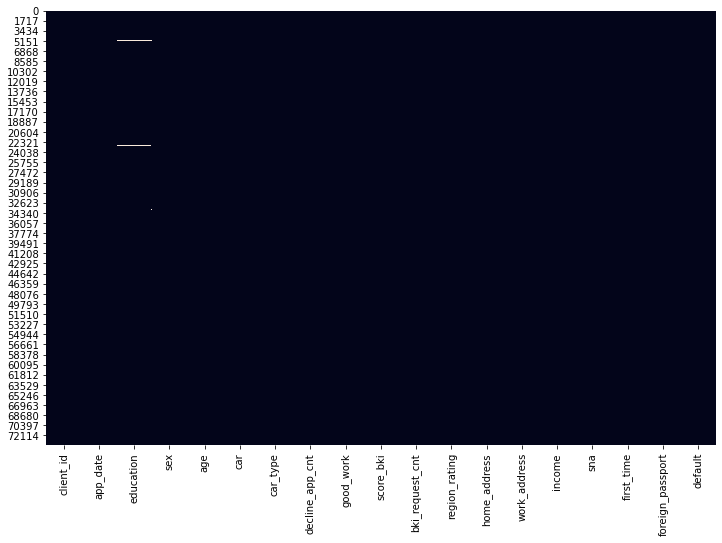

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
sns_heatmap = sns.heatmap(train.isna(),cbar=False)

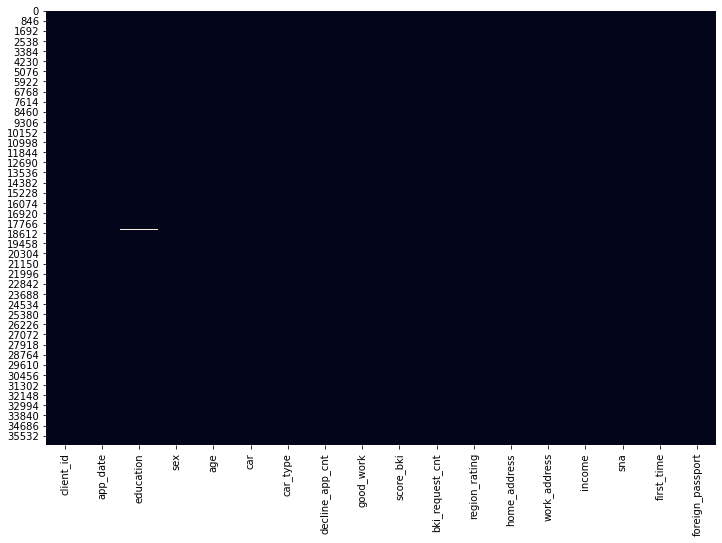

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
sns_heatmap = sns.heatmap(test.isna(),cbar=False)

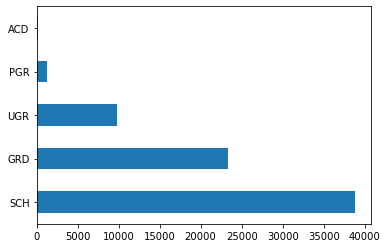

In [13]:
train['education'].value_counts().plot.barh()

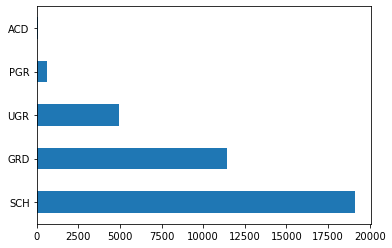

In [14]:
test['education'].value_counts().plot.barh()

In [15]:
train['education'].fillna('empty', inplace=True)
test['education'].fillna('empty', inplace=True)

Подробнее по признакам:

    client_id - идентификатор клиента
    education - уровень образования
    sex - пол заемщика
    age - возраст заемщика
    car - флаг наличия автомобиля
    car_type - флаг автомобиля иномарки
    decline_app_cnt - количество отказанных прошлых заявок
    good_work - флаг наличия “хорошей” работы
    bki_request_cnt - количество запросов в БКИ
    home_address - категоризатор домашнего адреса
    work_address - категоризатор рабочего адреса
    income - доход заемщика
    foreign_passport - наличие загранпаспорта
    sna - связь заемщика с клиентами банка
    first_time - давность наличия информации о заемщике
    score_bki - скоринговый балл по данным из БКИ
    region_rating - рейтинг региона
    app_date - дата подачи заявки
    default - флаг дефолта по кредиту

In [16]:
train.app_date = pd.to_datetime(train.app_date)
test.app_date = pd.to_datetime(test.app_date)
train.head(5)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,2014-02-01,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,False
1,63161,2014-03-12,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,False
2,25887,2014-02-01,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,False
3,16222,2014-01-23,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,False
4,101655,2014-04-18,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,False


In [17]:
current_date = pd.to_datetime('21APR2021')
train['days'] = (current_date - train.app_date).dt.days
test['days'] = (current_date - test.app_date).dt.days

In [18]:
# числовые 
num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income', 'score_bki']
# категориальные
cat_cols = ['education', 'work_address', 'home_address', 'sna', 'first_time', 'region_rating']
# бинарные
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

age 39.3905039812501

decline_app_cnt 0.2408772719512006

bki_request_cnt 1.9331336241016965

income 41799.713287907245

score_bki -1.938048147053856

________
age 38.52539479300043

decline_app_cnt 0.5154716175842936

bki_request_cnt 2.4623346137430646

income 36288.1133162612

score_bki -1.675637110018135



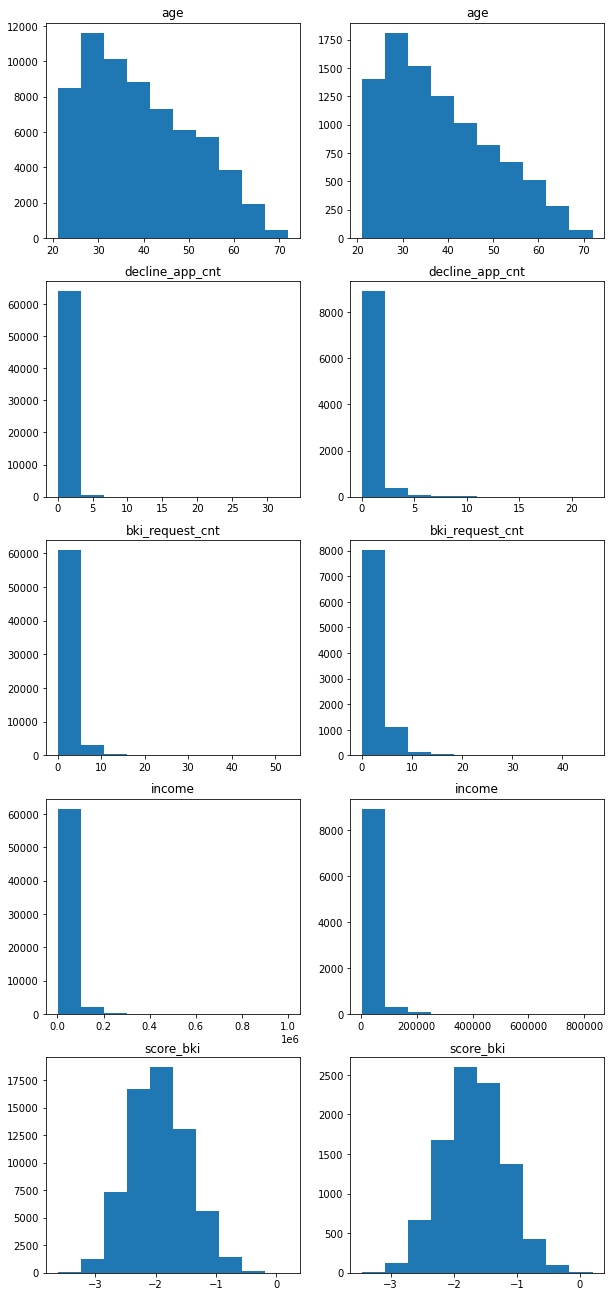

In [19]:
fig, axes = plt.subplots(len(num_cols), 2, figsize=(10,23))
a = 0
for i in num_cols:
    axes[a][0].hist(train[i][train['default'] != True].dropna())
    axes[a][0].set_title(i)
    print(i, train[i][train['default'] != True].dropna().mean())
    print('')
    a = a + 1
print('________')
a = 0
for i in num_cols:
    axes[a][1].hist(train[i][train['default'] == True].dropna())
    axes[a][1].set_title(i)
    print(i, train[i][train['default'] == True].dropna().mean())
    print('')
    a = a + 1

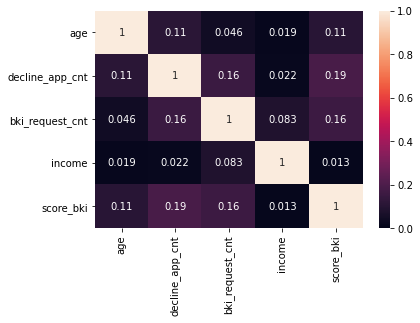

In [20]:
sns.heatmap(train[num_cols].corr().abs(), vmin=0, vmax=1, annot = True)

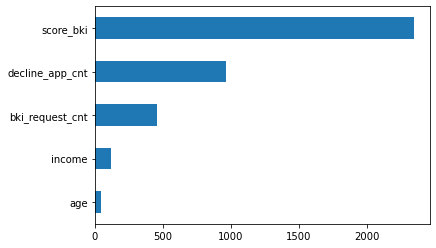

In [21]:
imp_num = Series(f_classif(train[num_cols], train['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [22]:
label_encoder = LabelEncoder()

for column in bin_cols:
    train[column] = label_encoder.fit_transform(train[column])
    
for column in bin_cols:
    test[column] = label_encoder.fit_transform(test[column])
train.head(5)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,days
0,25905,2014-02-01,SCH,1,62,1,1,0,0,-2.008753,1,50,1,2,18000,4,1,0,False,2636
1,63161,2014-03-12,SCH,0,59,0,0,0,0,-1.532276,3,50,2,3,19000,4,1,0,False,2597
2,25887,2014-02-01,SCH,1,25,1,0,2,0,-1.408142,1,80,1,2,30000,1,4,1,False,2636
3,16222,2014-01-23,SCH,0,53,0,0,0,0,-2.057471,2,50,2,3,10000,1,3,0,False,2645
4,101655,2014-04-18,GRD,1,48,0,0,0,1,-1.244723,1,60,2,3,30000,1,4,1,False,2560


In [23]:
num_cols_log = ['age', 'bki_request_cnt', 'income']

for i in num_cols_log:
    train[i] = np.log(train[i] + 1)
    
    
for i in num_cols_log:
    test[i] = np.log(test[i] + 1)

In [24]:
train['sna_ftime'] = train['sna'] * train['first_time']
test['sna_ftime'] = test['sna'] * test['first_time']

train['bki_reg'] = train['score_bki']*train['region_rating']
test['bki_reg'] = test['score_bki']*test['region_rating']

In [25]:
num_cols.append('sna_ftime')
num_cols.append('bki_reg')

In [26]:
train = pd.get_dummies(train, columns=['education'])
train = pd.get_dummies(train, columns=['region_rating'])
train.head(5)

,client_id,app_date,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,education_SCH,education_UGR,education_empty,region_rating_20,region_rating_30,region_rating_40,region_rating_50,region_rating_60,region_rating_70,region_rating_80
0,25905,2014-02-01,1,4.143135,1,1,0,0,-2.008753,0.693147,...,1,0,0,0,0,0,1,0,0,0
1,63161,2014-03-12,0,4.094345,0,0,0,0,-1.532276,1.386294,...,1,0,0,0,0,0,1,0,0,0
2,25887,2014-02-01,1,3.258097,1,0,2,0,-1.408142,0.693147,...,1,0,0,0,0,0,0,0,0,1
3,16222,2014-01-23,0,3.988984,0,0,0,0,-2.057471,1.098612,...,1,0,0,0,0,0,1,0,0,0
4,101655,2014-04-18,1,3.891820,0,0,0,1,-1.244723,0.693147,...,0,0,0,0,0,0,0,1,0,0


In [27]:
test = pd.get_dummies(test, columns=['education'])
test = pd.get_dummies(test, columns=['region_rating'])
test.head(5)

,client_id,app_date,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,education_SCH,education_UGR,education_empty,region_rating_20,region_rating_30,region_rating_40,region_rating_50,region_rating_60,region_rating_70,region_rating_80
0,74835,2014-03-22,1,3.401197,1,1,0,0,-2.271884,1.386294,...,0,0,0,0,0,0,1,0,0,0
1,17527,2014-01-24,0,3.688879,0,0,5,0,-1.504999,1.098612,...,1,0,0,0,0,0,1,0,0,0
2,75683,2014-03-23,1,3.931826,1,1,0,0,-1.691339,0.693147,...,0,1,0,0,0,0,1,0,0,0
3,26883,2014-02-03,1,4.043051,0,0,0,0,-2.374182,0.693147,...,1,0,0,0,0,1,0,0,0,0
4,28862,2014-02-04,0,3.663562,0,0,0,0,-2.487502,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [28]:
cat_cols = [
    'home_address', 'work_address', 'sna', 'first_time', 'education_ACD',
    'education_GRD', 'education_PGR', 'education_SCH', 'education_UGR',
    'region_rating_20', 'region_rating_30', 'region_rating_40',
    'region_rating_50', 'region_rating_60', 'region_rating_70',
    'region_rating_80'
]
x_cat = OneHotEncoder(sparse=False).fit_transform(train[cat_cols].values)
y_cat = OneHotEncoder(sparse=False).fit_transform(test[cat_cols].values)

print(x_cat.shape)
print(y_cat.shape)

(73799, 38)
(36349, 38)


Text(0.5, 1.0, 'num_cols')

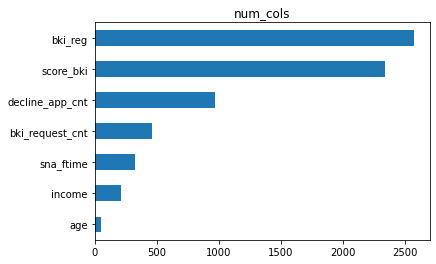

In [29]:
num = Series(f_classif(train[num_cols], train['default'])[0],
                 index=num_cols)
num.sort_values(inplace=True)
num.plot(kind='barh')
plt.title('num_cols')

Text(0.5, 1.0, 'bin_cols')

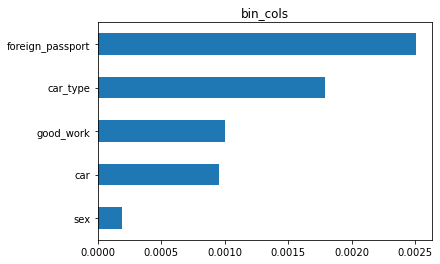

In [30]:
bin = Series(mutual_info_classif(train[bin_cols], train['default'],
                                     discrete_features=True), index=bin_cols)
bin.sort_values(inplace=True)
bin.plot(kind='barh')
plt.title('bin_cols')

Text(0.5, 1.0, 'cat_cols')

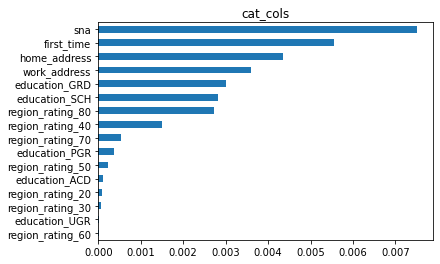

In [31]:
cat = pd.Series(mutual_info_classif(train[cat_cols], train['default'],
                                        discrete_features=True), index=train[cat_cols].columns)
cat.sort_values(inplace=True)
cat.plot(kind='barh')
plt.title('cat_cols')

In [32]:
train.head(5)

,client_id,app_date,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,education_SCH,education_UGR,education_empty,region_rating_20,region_rating_30,region_rating_40,region_rating_50,region_rating_60,region_rating_70,region_rating_80
0,25905,2014-02-01,1,4.143135,1,1,0,0,-2.008753,0.693147,...,1,0,0,0,0,0,1,0,0,0
1,63161,2014-03-12,0,4.094345,0,0,0,0,-1.532276,1.386294,...,1,0,0,0,0,0,1,0,0,0
2,25887,2014-02-01,1,3.258097,1,0,2,0,-1.408142,0.693147,...,1,0,0,0,0,0,0,0,0,1
3,16222,2014-01-23,0,3.988984,0,0,0,0,-2.057471,1.098612,...,1,0,0,0,0,0,1,0,0,0
4,101655,2014-04-18,1,3.891820,0,0,0,1,-1.244723,0.693147,...,0,0,0,0,0,0,0,1,0,0


In [33]:
corr_train = train.drop(['client_id'],axis = 1).corr()
corr_train.style.background_gradient(cmap='coolwarm').set_precision(3)

,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,home_address,work_address,income,sna,first_time,foreign_passport,default,days,sna_ftime,bki_reg,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,education_empty,region_rating_20,region_rating_30,region_rating_40,region_rating_50,region_rating_60,region_rating_70,region_rating_80
sex,1.000,-0.127,0.279,0.226,0.021,-0.040,-0.045,-0.047,0.038,0.069,0.305,-0.004,0.014,0.086,0.020,0.033,0.012,-0.101,0.016,0.025,0.017,-0.041,0.018,0.002,-0.024,-0.011,-0.050,-0.045,-0.003,0.046,0.086
age,-0.127,1.000,-0.037,-0.034,-0.118,-0.073,-0.110,0.049,0.000,-0.015,-0.093,-0.070,0.095,-0.037,-0.026,-0.017,-0.036,-0.025,0.004,-0.066,-0.007,0.171,-0.162,0.015,0.012,0.012,0.050,0.039,-0.007,-0.048,-0.062
car,0.279,-0.037,1.000,0.698,-0.033,0.002,-0.045,-0.046,-0.025,-0.008,0.325,-0.072,0.090,0.108,-0.043,0.022,-0.003,-0.078,0.024,0.109,0.067,-0.122,-0.001,0.009,-0.011,-0.011,-0.026,-0.030,-0.001,0.023,0.055
car_type,0.226,-0.034,0.698,1.000,-0.043,0.018,-0.040,-0.016,-0.012,0.001,0.370,-0.086,0.104,0.146,-0.057,0.027,-0.007,-0.101,0.030,0.153,0.087,-0.158,-0.014,-0.008,-0.013,-0.010,-0.027,-0.055,-0.027,0.050,0.097
decline_app_cnt,0.021,-0.118,-0.033,-0.043,1.000,-0.027,0.190,0.115,0.013,0.016,-0.010,0.065,-0.069,-0.026,0.114,0.021,0.026,0.164,-0.006,-0.037,-0.013,0.015,0.038,-0.014,0.009,0.011,0.022,0.006,0.008,-0.008,-0.035
good_work,-0.040,-0.073,0.002,0.018,-0.027,1.000,0.006,0.006,-0.004,-0.009,0.052,-0.054,0.056,0.046,-0.043,-0.005,-0.013,-0.046,0.042,0.152,0.049,-0.162,0.005,-0.002,0.015,0.004,-0.022,-0.046,-0.011,0.021,0.077
score_bki,-0.045,-0.110,-0.045,-0.040,0.190,0.006,1.000,0.140,0.014,0.013,0.003,0.068,-0.069,-0.022,0.175,0.064,0.040,0.742,-0.016,-0.020,-0.018,-0.001,0.039,-0.006,-0.005,-0.001,0.010,-0.017,-0.010,0.029,0.002
bki_request_cnt,-0.047,0.049,-0.046,-0.016,0.115,0.006,0.140,1.000,0.004,0.000,0.081,0.010,0.010,-0.003,0.079,0.010,0.026,0.111,-0.005,0.036,0.001,-0.010,-0.033,-0.009,0.005,-0.002,0.005,-0.001,0.010,0.013,-0.024
home_address,0.038,0.000,-0.025,-0.012,0.013,-0.004,0.014,0.004,1.000,0.728,0.047,0.115,-0.058,0.039,0.085,-0.164,0.062,-0.143,0.007,-0.007,-0.000,-0.007,0.019,0.005,0.045,-0.006,-0.059,-0.142,-0.006,-0.072,0.306
work_address,0.069,-0.015,-0.008,0.001,0.016,-0.009,0.013,0.000,0.728,1.000,0.068,0.111,-0.063,0.042,0.082,-0.164,0.059,-0.156,0.009,-0.010,-0.002,-0.007,0.023,0.005,0.039,-0.015,-0.080,-0.142,-0.027,0.027,0.278


In [34]:
X_cat = OneHotEncoder(sparse = False).fit_transform(train[cat_cols].values)
Y_cat = OneHotEncoder(sparse = False).fit_transform(test[cat_cols].values)
display(X_cat, Y_cat)

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [35]:
X_num = StandardScaler().fit_transform(train[num_cols].values)
Y_num = StandardScaler().fit_transform(test[num_cols].values)
display(X_num, Y_num)

array([[ 1.71113664, -0.34285766, -0.28100505, ..., -0.2087987 ,
        -0.08042749,  0.19738376],
       [ 1.5399884 , -0.34285766,  0.77260728, ...,  0.74754461,
        -0.08042749,  0.82015213],
       [-1.39343857,  2.14387966, -0.28100505, ...,  0.99669566,
        -0.08042749, -0.12189008],
       ...,
       [-0.66507223, -0.34285766,  1.11179469, ...,  0.78696739,
        -0.08042749, -0.34040932],
       [-0.89146325, -0.34285766,  0.77260728, ...,  0.85380611,
         0.73304037,  0.88934935],
       [-0.35072683, -0.34285766,  0.33531865, ...,  0.28102087,
        -0.48716142,  0.51635304]])

array([[-0.88333898, -0.33995109,  0.76643419, ..., -0.73288746,
        -0.07356829, -0.14131752],
       [ 0.12606863,  6.00146439,  0.33072139, ...,  0.79551047,
         3.20908805,  0.851954  ],
       [ 0.97850869, -0.33995109, -0.28338131, ...,  0.42413578,
        -0.48390034,  0.61060592],
       ...,
       [-0.65688874,  2.1966151 , -0.28338131, ...,  1.92005304,
         1.56775988,  1.58276898],
       [-1.12541848,  0.92833201,  0.33072139, ...,  1.31888606,
        -1.30456442,  0.22659398],
       [ 0.0372345 , -0.33995109,  0.33072139, ...,  0.79042787,
         1.56775988,  0.84865094]])

In [36]:
X = np.hstack([X_num, train[bin_cols].values, X_cat])
Y = train['default'].values

id_test = test['client_id']
test = np.hstack([Y_num, test[bin_cols].values, Y_cat])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle = True)

In [38]:
C = np.logspace(0, 4, 10)

penalty = ['l1', 'l2']
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

print('Лучший penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

Лучший penalty: l2
Лучшее C: 464.15888336127773


In [39]:
model = LogisticRegression(penalty='l2', C=best_model.best_estimator_.get_params()['C'], max_iter=800)
model.fit(X_train, y_train)

LogisticRegression(C=464.15888336127773, max_iter=800)

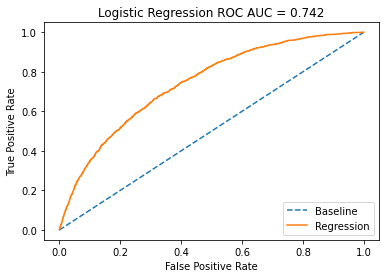

In [40]:
probs = model.predict_proba(X_test)
probs = probs[:, 1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label='Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [41]:
Y_predicted = model.predict(X_test)
logisitc_metrics(y_test, Y_predicted)

acc = 0.88 F1-score = 0.04


In [42]:
cm = confusion_matrix(y_test, Y_predicted)

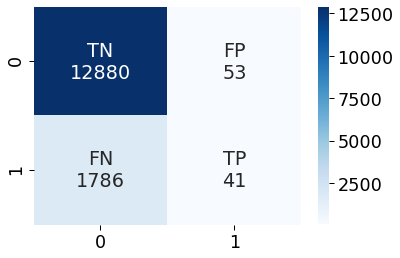

In [43]:
sns.set_context(context='paper', font_scale=2, rc=None)
group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [44]:
model = LogisticRegression(penalty='l2', C=best_model.best_estimator_.get_params()['C'], max_iter=800)
model.fit(X, Y)
probs = model.predict_proba(test)
probs = probs[:, 1]

In [45]:
submission = pd.DataFrame({'client_id': id_test,
                              'default': probs})
submission.to_csv('submission.csv', index=False)
submission.head(10)

,client_id,default
0,74835,0.040320
1,17527,0.373854
2,75683,0.068015
3,26883,0.084934
4,28862,0.019734
5,99881,0.205354
6,26630,0.355939
7,79934,0.033228
8,16605,0.019805
9,105449,0.030240
